### May be possible to entangle all ions with global pulse with multiple tones.

In [1]:
from numpy import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Error_dist import func_str

Function: - log(a / x ** 0.5 + b / x ** 0.7 + c / x ** 1 + d / x ** 1.5 + e / x ** 2)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


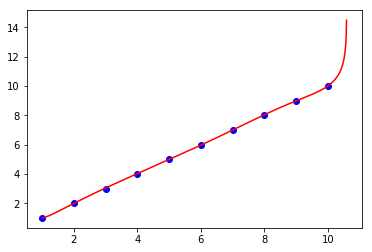

Parameters: [ -3.73276651  12.85974648 -18.03505101  15.04548127  -5.76818411]


In [111]:
# 10-ion test

N = 11

x = arange(1, N)
y = x

def func(x, a, b, c, d, e):
    return (a / x ** 0.5 + b / x ** 0.7 + c / x ** 1 + d / x ** 1.5 + e / x ** 2)

# Assume entangling strengt\ scales as 1 / d ^ r where 0.5 < r < 3
def func_log(x, a, b, c, d, e):
    return - log(a / x ** 0.5 + b / x ** 0.7 + c / x ** 1 + d / x ** 1.5 + e / x ** 2)

popt, pcov = curve_fit(func_log, x, y)

x_cont = linspace(1, N, 1000)
y_cont = func_log(x_cont, *popt)

print(f'Function: {func_str(func_log)}')

plt.plot(x, y, 'bo')
plt.plot(x_cont, y_cont, 'r')
plt.show()

print(f"Parameters: {popt}")

Function: (a / x ** 0.5 + b / x ** 0.7 + c / x ** 1 + d / x ** 1.5 + e / x ** 2)


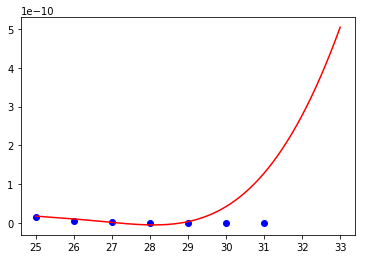

Parameters (normalized by 0.0002131361982161863): [  1.          -4.61750126  10.22705205 -19.6067829   20.55755071]


In [131]:
def func(x, a, b, c, d, e):
    return (a / x ** 0.5 + b / x ** 0.7 + c / x ** 1 + d / x ** 1.5 + e / x ** 2)


# Assume entangling strengt\ scales as 1 / d ^ r where 0.5 < r < 3
def func_log(x, a, b, c, d, e):
    return - log(func(x, a, b, c, d, e))

N_start = 21
N = 30

x = arange(N_start, N)
y = exp(-x)


popt, pcov = curve_fit(func, x, y)


x_disc = arange(25, N+2)
y_disc = exp(-x_disc)
L = len(x_disc)

x_cont = linspace(25, N+3, 1000)
y_cont = func(x_cont, *popt)

x = arange(1, N)
y = exp(-x)

print(f'Function: {func_str(func)}')

plt.plot(x_disc, y_disc, 'bo')
plt.plot(x_cont, y_cont, 'r')
# plt.ylim([y_disc[L-1] * 0.9, y_disc[0] * 1.1])
# plt.ylim([y_disc[L-1] * 0.9, y_disc[0] * 0.01])

plt.show()

print(f"Parameters (normalized by {popt[0]}): {popt / popt[0]}")
# print(f"Covariance: {pcov}")



In [ ]:
N = 20
x = linspace(1, N, 300)
plt.plot(x, func1(x, *popt))
x_dots = arange(1, N)
plt.plot(x_dots, exp(-x_dots), 'ro')
plt.ylim([-0.01, 0.5])
